In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# load S&P 500 company data
stocks = pd.read_csv('./archive/sp500_companies.csv').set_index('Symbol')
stocks.head()

,Exchange,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
Symbol,,,,,,,,,,,,,,,
AAPL,NMS,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,254.49,3846819807232,1.346610e+11,0.061,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.069209
NVDA,NMS,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,134.70,3298803056640,6.118400e+10,1.224,Santa Clara,CA,United States,29600.0,NVIDIA Corporation provides graphics and compu...,0.059350
MSFT,NMS,Microsoft Corporation,Microsoft Corporation,Technology,Software - Infrastructure,436.60,3246068596736,1.365520e+11,0.160,Redmond,WA,United States,228000.0,Microsoft Corporation develops and supports so...,0.058401
AMZN,NMS,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,224.92,2365033807872,1.115830e+11,0.110,Seattle,WA,United States,1551000.0,"Amazon.com, Inc. engages in the retail sale of...",0.042550
GOOGL,NMS,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,191.41,2351625142272,1.234700e+11,0.151,Mountain View,CA,United States,181269.0,Alphabet Inc. offers various products and plat...,0.042309


In [3]:
# load weekly returns data
weekly_returns = pd.read_csv('./data/raw/weekly_returns.csv').set_index('Date')
weekly_returns.head(n=10)

,AAPL,NVDA,MSFT,AMZN,GOOGL,GOOG,META,TSLA,AVGO,BRK-B,...,IVZ,APA,MOS,MHK,CE,HII,CZR,BWA,QRVO,FMC
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-10 00:00:00-05:00,-0.123687,0.242429,-0.378853,-0.477075,0.613705,0.750923,-0.343752,2.581391,0.320071,0.381205,...,1.317173,2.149616,2.580269,0.360667,0.846640,-0.200051,0.836499,0.962620,1.348889,0.789427
2021-01-17 00:00:00-05:00,-0.969367,-0.459599,-0.964454,-0.516445,-0.960328,-0.968183,-1.038995,-0.738374,0.008553,-0.094969,...,1.360636,0.563075,1.114673,0.679778,-0.331963,0.341542,0.213534,-0.986460,-0.209972,-0.129378
2021-01-24 00:00:00-05:00,1.940776,0.547981,1.762202,1.062382,2.152232,2.135243,1.846799,0.022668,0.512608,-0.369001,...,0.660996,-1.548578,-0.336283,-0.274163,-0.753000,-0.630235,0.245502,1.788912,-0.319325,-0.932642
2021-01-31 00:00:00-05:00,-1.342540,-0.779353,0.785023,-0.547918,-0.845156,-0.844229,-1.009374,-0.757407,-0.575749,-0.901156,...,-0.356038,-1.894703,-1.474842,-0.790944,-1.197858,-1.550996,-1.724866,-0.439842,-0.987736,-0.837837
2021-02-07 00:00:00-05:00,0.952229,0.651250,1.291844,0.921149,3.223903,3.224850,0.617166,0.834346,0.614348,1.294639,...,1.254165,1.759148,1.064699,1.133028,0.680250,0.999671,2.307805,0.600643,-0.392746,0.934123
2021-02-14 00:00:00-05:00,-0.261343,1.382555,0.342511,-0.464696,0.071447,0.070226,0.148163,-0.506172,0.774262,1.256806,...,0.753557,1.033133,0.961185,1.960167,0.770747,1.758523,-0.457366,-0.600643,0.916692,-1.019671
2021-02-21 00:00:00-05:00,-1.015720,-0.309313,-0.364878,-0.077726,0.000692,0.060416,-0.551990,-0.445699,0.433727,0.356820,...,0.030355,0.820930,0.729578,1.382877,0.586811,1.608090,0.820168,0.383686,0.475244,-0.704234
2021-02-28 00:00:00-05:00,-1.754885,-1.218887,-1.085492,-1.024402,-0.784737,-0.750338,-0.252339,-1.701145,-0.759881,-0.228419,...,-0.043374,1.251965,0.184751,0.334959,0.441807,-0.700549,1.646734,0.835619,-0.467117,-0.521092
2021-03-07 00:00:00-05:00,0.033732,-1.379011,-0.100544,-0.628093,0.879877,0.835241,0.424337,-1.425701,-0.778573,2.105755,...,1.130199,2.267066,0.407447,1.158315,1.024621,1.311580,-0.019671,1.885096,-0.339423,0.151142


In [4]:
# compute Spearman correlation matrix
wr_corr = weekly_returns.corr(method="spearman")
wr_corr = wr_corr - (wr_corr == 1)

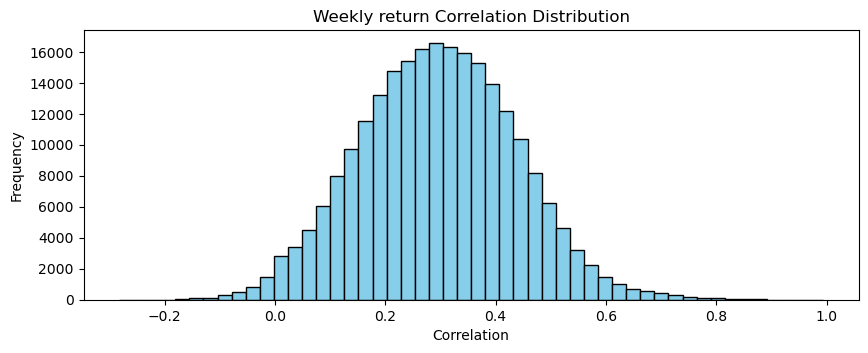

In [5]:
# draw distribution of correlations
plt.figure(figsize=(10, 3.5))
plt.hist(wr_corr.values.flatten(), bins=50, color='skyblue', edgecolor='black')
plt.title('Weekly return Correlation Distribution')
plt.xlabel('Correlation')
plt.ylabel('Frequency')
plt.show()

n_weeks: 253
r_crit: 0.5298536523193113


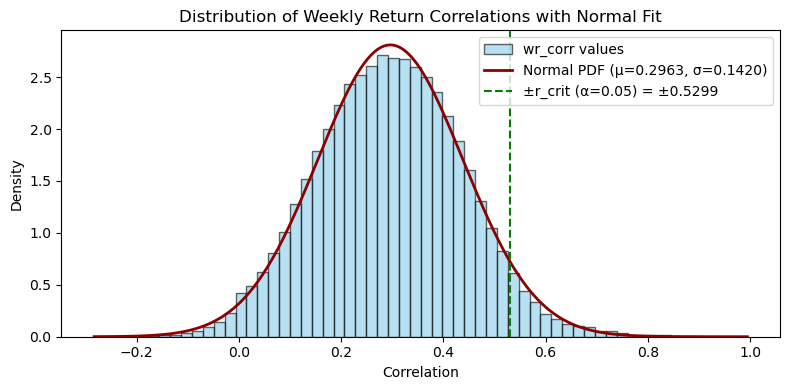

Mean: 0.2963, std: 0.1420, n_weeks: 253
Significance threshold (two-tailed, α=0.05): |r| > 0.5299 (Normal approx)
Correlations count: 119316, num significant: 5614, fraction: 0.0471
Top significant correlations:
GOOGL - GOOG: 0.9943
FOXA - FOX: 0.9878
NWS - NWSA: 0.9712
DHI - LEN: 0.9266
MAA - CPT: 0.9245
VMC - MLM: 0.9223
AVB - EQR: 0.9211
EQR - UDR: 0.9176
HD - LOW: 0.9066
ESS - UDR: 0.9022


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

# Extract off-diagonal correlations (upper triangle) to avoid self-correlation
vals = wr_corr.values[np.triu_indices_from(wr_corr, k=1)].flatten()
# Remove NaNs
vals = vals[~np.isnan(vals)]

# Calculate mean and std from off-diagonal correlations
wr_mean = vals.mean()
wr_std = vals.std(ddof=0)

# Plot histogram of all correlation values (including lower triangle/diagonal for visual fullness)
all_wr = wr_corr.values.flatten()
all_wr = all_wr[~np.isnan(all_wr)]

plt.figure(figsize=(8, 4))
count, bins, patches = plt.hist(all_wr, bins=60, density=True, color='skyblue', edgecolor='black', alpha=0.6, label='wr_corr values')

# Overlay normal PDF using empirical mean/std
x = np.linspace(bins.min(), bins.max(), 400)
pdf = norm.pdf(x, loc=wr_mean, scale=wr_std)
plt.plot(x, pdf, color='darkred', lw=2, label=f'Normal PDF (μ={wr_mean:.4f}, σ={wr_std:.4f})')

# Calculate significance threshold using normal approximation
try:
    n_weeks = weekly_returns.shape[0]
except Exception:
    n_weeks = 52  # default to 1 year
print('n_weeks:', n_weeks)
alpha = 0.05
r_crit = norm.ppf(1 - alpha, loc=wr_mean, scale=wr_std)
print('r_crit:', r_crit)

# Mark thresholds on plot
plt.axvline(r_crit, color='green', linestyle='--', lw=1.5, label=f'±r_crit (α={alpha}) = ±{r_crit:.4f}')

plt.title('Distribution of Weekly Return Correlations with Normal Fit')
plt.xlabel('Correlation')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

# Print summary statistics and significance counts
print(f'Mean: {wr_mean:.4f}, std: {wr_std:.4f}, n_weeks: {n_weeks}')
print(f'Significance threshold (two-tailed, α={alpha}): |r| > {r_crit:.4f} (Normal approx)')

# Fraction of off-diagonal correlations exceeding threshold
frac_significant = np.mean(np.abs(vals) > r_crit)
num_significant = int(np.sum(np.abs(vals) > r_crit))
print(f'Correlations count: {len(vals)}, num significant: {num_significant}, fraction: {frac_significant:.4f}')

# Show top correlations above threshold
if num_significant > 0:
    pairs = []
    idxs = np.triu_indices_from(wr_corr, k=1)
    for i, j in zip(idxs[0], idxs[1]):
        r = wr_corr.iat[i, j]
        if abs(r) > r_crit:
            pairs.append((wr_corr.index[i], wr_corr.columns[j], r))
    pairs_sorted = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)
    print('Top significant correlations:')
    for a, b, r in pairs_sorted[:10]:
        print(f"{a} - {b}: {r:.4f}")
else:
    print('No off-diagonal correlations exceed the significance threshold.')

In [8]:
wr_mean.mean()

np.float64(0.2963315753453568)

In [9]:
wr_corr['MNST']['WMT']

np.float64(0.3339046551987326)

In [10]:
# Build graph based on significant correlations
wr_corr_np = wr_corr.to_numpy()
adj_wr_corr = (wr_corr_np * (abs(wr_corr_np) > r_crit).astype(int))

wr_corr_graph = nx.from_numpy_array(adj_wr_corr)
wr_corr_graph = nx.relabel_nodes(wr_corr_graph, dict(enumerate(wr_corr.index)))

# plt.figure(figsize=(12, 5))
# nx.draw(wr_corr_graph, with_labels=True, node_size=500, node_color='skyblue', font_size=8, font_weight='bold', font_color='black', pos=nx.spring_layout(wr_corr_graph))
# plt.title('Stocks Graph by Weekly Return Correlation')
# plt.show()

In [11]:
np.count_nonzero(adj_wr_corr)

11228

In [12]:
print(f'Stocks Graph (Mean degree: {np.mean([degree for node, degree in wr_corr_graph.degree]):.2f}, Density: {nx.density(wr_corr_graph):.4f})')

Stocks Graph (Mean degree: 22.96, Density: 0.0471)


In [13]:
np.save('./data/raw/adj_wr.npy', adj_wr_corr)

In [ ]:
# Build adjacency matrix based on sector information
stocks_names = weekly_returns.columns
stocks_with_return = stocks.loc[stocks_names]
adj_stocks = np.array([
	[stocks.loc[stock1, 'Sector'] == stocks.loc[stock2, 'Sector'] * (stock1 != stock2) for stock1 in stocks_with_return.index] for stock2 in stocks_with_return.index
]).astype(int)
np.save('./data/raw/adj_sector.npy', adj_stocks)

In [ ]:
# Save stock names
stocks_names_np = stocks_names.to_numpy()
np.save('./data/raw/stock_names.npy', stocks_names_np)

count:  Counter({1: 47, 0: 41, 2: 23, 4: 16, 3: 15, 25: 15, 7: 13, 5: 13, 13: 13, 28: 12, 30: 11, 19: 11, 26: 11, 22: 10, 18: 10, 23: 9, 9: 9, 15: 8, 21: 8, 8: 8, 24: 8, 6: 7, 10: 7, 14: 7, 11: 7, 12: 7, 33: 7, 16: 6, 20: 6, 60: 5, 27: 5, 49: 5, 29: 5, 39: 5, 67: 5, 37: 4, 42: 4, 32: 4, 70: 3, 41: 3, 36: 3, 17: 3, 44: 2, 34: 2, 35: 2, 73: 2, 40: 2, 53: 2, 47: 2, 48: 2, 46: 2, 76: 2, 50: 2, 57: 2, 110: 2, 38: 2, 133: 2, 77: 2, 74: 2, 66: 2, 56: 1, 88: 1, 125: 1, 98: 1, 45: 1, 81: 1, 84: 1, 118: 1, 65: 1, 106: 1, 83: 1, 59: 1, 52: 1, 119: 1, 85: 1, 72: 1, 31: 1, 69: 1, 90: 1, 43: 1, 51: 1, 80: 1, 101: 1, 58: 1, 55: 1, 61: 1, 82: 1, 86: 1, 111: 1, 87: 1, 63: 1, 64: 1, 92: 1, 62: 1})


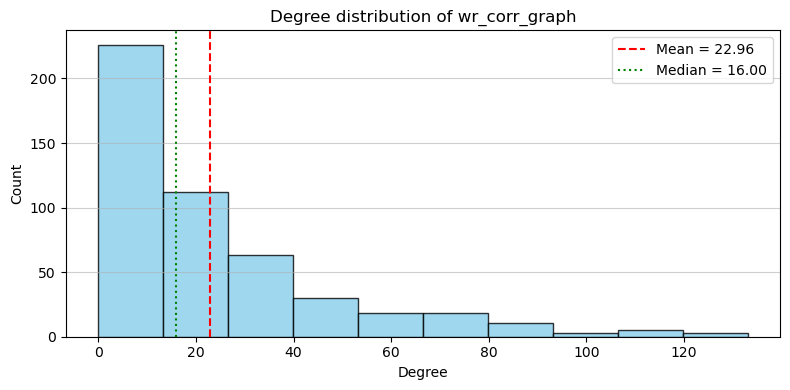

Number of nodes: 489
Mean degree: 22.96, Median degree: 16.00, Min: 0, Max: 133


In [ ]:
from collections import Counter
import statistics
# Histogram of degrees for wr_corr_graph
degrees = [d for _, d in wr_corr_graph.degree()]
print('count: ', Counter(degrees))
mean_deg = statistics.mean(degrees) if len(degrees) > 0 else 0
median_deg = statistics.median(degrees) if len(degrees) > 0 else 0

plt.figure(figsize=(8, 4))
plt.hist(degrees,  color='skyblue', edgecolor='black', alpha=0.8)
plt.title('Degree distribution of wr_corr_graph')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.6)
plt.axvline(mean_deg, color='red', linestyle='--', label=f'Mean = {mean_deg:.2f}')
plt.axvline(median_deg, color='green', linestyle=':', label=f'Median = {median_deg:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Number of nodes: {len(degrees)}")
print(f"Mean degree: {mean_deg:.2f}, Median degree: {median_deg:.2f}, Min: {min(degrees) if degrees else 0}, Max: {max(degrees) if degrees else 0}")

In [ ]:
# filter historical data based on stock names and date
values = pd.read_csv('./data/raw/history.csv').set_index(['Symbol', 'Date'])
values = values.loc[stocks_names]
values = values.reset_index()
# change 'Date' to datetime type
values['Date'] = pd.to_datetime(values['Date'])
values = values.set_index(['Symbol']).sort_index()

# filter dates after 2021-02-11
cutoff_date = pd.Timestamp('2021-02-11', tz='UTC') 
filtered_values = values[values['Date'] > cutoff_date]

filtered_values = filtered_values.reset_index()
filtered_values = filtered_values.set_index(['Symbol', 'Date']).sort_index()
filtered_values.to_csv('./data/raw/filtered_history.csv')

/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_13342/505677911.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  values['Date'] = pd.to_datetime(values['Date'])


In [18]:
filtered_values.head()

Open        High         Low  \
Symbol Date                                                            
A      2021-02-11 00:00:00-05:00  121.700008  123.210371  121.128786   
       2021-02-12 00:00:00-05:00  122.890880  124.507744  122.300291   
       2021-02-16 00:00:00-05:00  125.195157  126.908837  123.781617   
       2021-02-17 00:00:00-05:00  128.574073  132.621051  125.466214   
       2021-02-18 00:00:00-05:00  124.895030  126.240798  123.520219   

                                       Close     Volume  NormClose  \
Symbol Date                                                          
A      2021-02-11 00:00:00-05:00  122.919914  1122200.0  -0.553780   
       2021-02-12 00:00:00-05:00  123.907471  1278000.0  -0.484299   
       2021-02-16 00:00:00-05:00  123.878433  2132500.0  -0.486342   
       2021-02-17 00:00:00-05:00  125.979347  4214700.0  -0.338530   
       2021-02-18 00:00:00-05:00  123.617035  1941400.0  -0.504733   

                                  DailyLogReturn     ALR1W     ALR2W  \
Symbol Date                                                            
A      2021-02-11 00:00:00-05:00        0.833296  0.586049  0.799283   
       2021-02-12 00:00:00-05:00        0.446967  0.972950  1.157926   
       2021-02-16 00:00:00-05:00       -0.013091  0.919505  1.052891   
       2021-02-17 00:00:00-05:00        0.939356  1.382615  1.006438   
       2021-02-18 00:00:00-05:00       -1.057344  0.523638  0.814241   

                                     ALR1M     ALR2M       RSI      MACD  
Symbol Date                                                               
A      2021-02-11 00:00:00-05:00 -0.001002  0.634803  0.615066  0.838827  
       2021-02-12 00:00:00-05:00  0.099614  0.735490  0.636742  1.085881  
       2021-02-16 00:00:00-05:00  0.192002  0.871449  0.635609  1.264751  
       2021-02-17 00:00:00-05:00  0.387436  0.976631  0.679990  1.558072  
       2021-02-18 00:00:00-05:00  0.032866  0.811816  0.592592  1.581679

In [19]:
print(filtered_values.drop(columns=["Open", "High", "Low", "Close"]).to_numpy().shape, len(adj_wr_corr))

(580932, 9) 489


In [20]:
filtered_values.drop(columns=["Close"])

Open        High         Low  \
Symbol Date                                                            
A      2021-02-11 00:00:00-05:00  121.700008  123.210371  121.128786   
       2021-02-12 00:00:00-05:00  122.890880  124.507744  122.300291   
       2021-02-16 00:00:00-05:00  125.195157  126.908837  123.781617   
       2021-02-17 00:00:00-05:00  128.574073  132.621051  125.466214   
       2021-02-18 00:00:00-05:00  124.895030  126.240798  123.520219   
...                                      ...         ...         ...   
ZTS    2025-10-28 00:00:00-04:00  146.310568  146.948346  144.815772   
       2025-10-29 00:00:00-04:00  144.746004  145.603020  143.221314   
       2025-10-30 00:00:00-04:00  141.945762  144.536732  141.945762   
       2025-10-31 00:00:00-04:00  142.570007  144.679993  142.309998   
       2025-11-03 00:00:00-05:00  143.369995  144.829895  142.139999   

                                     Volume  NormClose  DailyLogReturn  \
Symbol Date                                                              
A      2021-02-11 00:00:00-05:00  1122200.0  -0.553780        0.833296   
       2021-02-12 00:00:00-05:00  1278000.0  -0.484299        0.446967   
       2021-02-16 00:00:00-05:00  2132500.0  -0.486342       -0.013091   
       2021-02-17 00:00:00-05:00  4214700.0  -0.338530        0.939356   
       2021-02-18 00:00:00-05:00  1941400.0  -0.504733       -1.057344   
...                                     ...        ...             ...   
ZTS    2025-10-28 00:00:00-04:00  2934300.0  -1.355567       -0.893501   
       2025-10-29 00:00:00-04:00  3186200.0  -1.436276       -0.627235   
       2025-10-30 00:00:00-04:00  2476000.0  -1.427491        0.068584   
       2025-10-31 00:00:00-04:00  3338200.0  -1.400495        0.210278   
       2025-11-03 00:00:00-05:00  3991266.0  -1.386170        0.111292   

                                     ALR1W     ALR2W     ALR1M     ALR2M  \
Symbol Date                                                                
A      2021-02-11 00:00:00-05:00  0.586049  0.799283 -0.001002  0.634803   
       2021-02-12 00:00:00-05:00  0.972950  1.157926  0.099614  0.735490   
       2021-02-16 00:00:00-05:00  0.919505  1.052891  0.192002  0.871449   
       2021-02-17 00:00:00-05:00  1.382615  1.006438  0.387436  0.976631   
       2021-02-18 00:00:00-05:00  0.523638  0.814241  0.032866  0.811816   
...                                    ...       ...       ...       ...   
ZTS    2025-10-28 00:00:00-04:00 -0.129530  0.277045  0.237942 -0.660999   
       2025-10-29 00:00:00-04:00 -0.604804  0.261115 -0.239493 -0.877853   
       2025-10-30 00:00:00-04:00 -0.437741  0.119970 -0.286010 -0.625405   
       2025-10-31 00:00:00-04:00 -0.257691  0.075598 -0.190479 -0.558216   
       2025-11-03 00:00:00-05:00 -0.508484 -0.029358 -0.157170 -0.592432   

                                       RSI      MACD  
Symbol Date                                           
A      2021-02-11 00:00:00-05:00  0.615066  0.838827  
       2021-02-12 00:00:00-05:00  0.636742  1.085881  
       2021-02-16 00:00:00-05:00  0.635609  1.264751  
       2021-02-17 00:00:00-05:00  0.679990  1.558072  
       2021-02-18 00:00:00-05:00  0.592592  1.581679  
...                                    ...       ...  
ZTS    2025-10-28 00:00:00-04:00  0.493725 -0.124046  
       2025-10-29 00:00:00-04:00  0.451033 -0.233248  
       2025-10-30 00:00:00-04:00  0.456541 -0.303427  
       2025-10-31 00:00:00-04:00  0.474008 -0.315865  
       2025-11-03 00:00:00-05:00  0.483495 -0.301269  

[580932 rows x 12 columns]

In [ ]:
# reshape features into [N_nodes, N_timestamps, N_feats]
nodes_num = len(adj_wr_corr)
df = filtered_values.drop(columns=["Open", "High", "Low"])
print(df.head())
features_num = df.shape[1]
print(df.to_numpy().shape, nodes_num)
x = np.array(
	df.to_numpy().reshape((nodes_num, -1, features_num))
)  # [N_nodes, N_timestamps, N_feats]

                                       Close     Volume  NormClose  \
Symbol Date                                                          
A      2021-02-11 00:00:00-05:00  122.919914  1122200.0  -0.553780   
       2021-02-12 00:00:00-05:00  123.907471  1278000.0  -0.484299   
       2021-02-16 00:00:00-05:00  123.878433  2132500.0  -0.486342   
       2021-02-17 00:00:00-05:00  125.979347  4214700.0  -0.338530   
       2021-02-18 00:00:00-05:00  123.617035  1941400.0  -0.504733   

                                  DailyLogReturn     ALR1W     ALR2W  \
Symbol Date                                                            
A      2021-02-11 00:00:00-05:00        0.833296  0.586049  0.799283   
       2021-02-12 00:00:00-05:00        0.446967  0.972950  1.157926   
       2021-02-16 00:00:00-05:00       -0.013091  0.919505  1.052891   
       2021-02-17 00:00:00-05:00        0.939356  1.382615  1.006438   
       2021-02-18 00:00:00-05:00       -1.057344  0.523638  0.814241   

    

In [36]:
y = np.array(
    df["DailyLogReturn"].to_numpy().reshape((nodes_num, -1))
)
print(y.shape)

(489, 1188)


In [23]:
all_sectors = stocks.loc[stocks_names, 'Sector']

In [ ]:
unique_sectors = all_sectors.unique()
n_sectors = len(unique_sectors)

# One-hot encode sectors
sector_to_onehot = {
    sector: np.zeros(n_sectors, dtype=np.float32) for sector in unique_sectors
}
for idx, sector in enumerate(unique_sectors):
    sector_to_onehot[sector][idx] = 1
print('sectors num:', n_sectors)
print(sector_to_onehot)

sectors num: 11
{'Technology': array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'Consumer Cyclical': array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'Communication Services': array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'Financial Services': array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 'Consumer Defensive': array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32), 'Healthcare': array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32), 'Energy': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32), 'Basic Materials': array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32), 'Industrials': array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32), 'Utilities': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32), 'Real Estate': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)}


In [ ]:
# Create sector feature matrix
merge_adj_mat = adj_wr_corr + 10 * adj_stocks
merge_adj_idx = (merge_adj_mat > 0).astype(np.int64)

In [ ]:
import torch

# Create small graph for testing
merge_adj_mat_small = merge_adj_mat[:100, :100]
merge_adj_idx_small = merge_adj_idx[:100, :100]
edge_num_small = np.count_nonzero(merge_adj_idx_small)
edge_index_small = np.zeros((2, edge_num_small))
edge_attr_small = np.zeros((edge_num_small, n_sectors + 1))
cnt = 0
for i in range(100):
    for j in range(100):
        if merge_adj_mat_small[i, j] > 0:
            edge_index_small[:, cnt] = np.array([i, j])
            if merge_adj_mat_small[i, j] >= 10:
                edge_attr_small[cnt, :n_sectors] = sector_to_onehot[stocks.loc[stocks_with_return.index[i], 'Sector']]
            edge_attr_small[cnt, n_sectors] = wr_corr_np[i, j]
            cnt += 1
print(edge_num_small)
edge_index = torch.tensor(edge_index_small, dtype=torch.long)
edge_attr = torch.Tensor(edge_attr_small)
torch.save(edge_index, './data/processed/edge_index_small.pt')
torch.save(edge_attr, './data/processed/edge_attr_small.pt')
x_small = torch.tensor(x[:100, :, :], dtype=torch.float32)
x_small = x_small.transpose(1, 2)
print(x_small.shape)
y_small = torch.Tensor(y[:100])
torch.save(x_small, './data/processed/feature_small.pt')
torch.save(y_small, "./data/processed/daily_log_return_y_small.pt")

1648
torch.Size([100, 1188, 10])


/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_13342/113134007.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_small = torch.tensor(x[:100, :, :], dtype=torch.float32)


In [30]:
print(y.shape)

torch.Size([100, 1188])


In [ ]:
from torch_geometric.data import Data

# Create full graph data
edge_num = np.count_nonzero(merge_adj_idx)
edge_index = np.zeros((2, edge_num))
edge_attr = np.zeros((edge_num, n_sectors + 1))

/Users/jiamingshen/miniforge3/envs/finance/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
cnt = 0
# Build edge_index and edge_attr
for i in range(nodes_num):
    for j in range(nodes_num):
        if merge_adj_mat[i, j] > 0:
            edge_index[:, cnt] = np.array([i, j])
            if merge_adj_mat[i, j] >= 10:
                # sector one-hot encoding
                edge_attr[cnt, :n_sectors] = sector_to_onehot[stocks.loc[stocks_with_return.index[i], 'Sector']]
            # correlation value
            edge_attr[cnt, n_sectors] = wr_corr_np[i, j]
            cnt += 1

In [ ]:
import torch

# store full graph data
edge_index = torch.tensor(edge_index, dtype=torch.long)
edge_attr = torch.tensor(edge_attr, dtype=torch.float32)
torch.save(edge_index, './data/processed/edge_index.pt')
torch.save(edge_attr, './data/processed/edge_attr.pt')

/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_13342/3372150828.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_index = torch.tensor(edge_index, dtype=torch.long)
/var/folders/0b/_l3wmgk55hv1qrgkh2sg4vzm0000gn/T/ipykernel_13342/3372150828.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  edge_attr = torch.tensor(edge_attr, dtype=torch.float32)


In [ ]:
# get node features
x = torch.tensor(x, dtype=torch.float32)
x = x.transpose(1, 2)
print(x.shape)

torch.Size([489, 10, 1188])


In [ ]:
# store x and y
y = torch.tensor(y, dtype=torch.float32)
torch.save(x, './data/processed/feature.pt')
torch.save(y, "./data/processed/daily_log_return_y.pt")